# load packages

In [49]:
import warnings
warnings.filterwarnings("ignore")

import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
import torch

from scGES import scGES_API
from scGES import metric

import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2"
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
os.environ['R_HOME'] = '/home/dszspur/.conda/envs/py38/lib/R'

os.chdir('/mnt/mechanical_drive/DATA/dszspur/scGES')

# load datasets

We utilized hematopoietic stem cell datasets from [GSE72857](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE72857) and [GSE81682](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE81682). You can also quickly obtain h5ad files from [here](https://drive.google.com/drive/folders/1XezRwidgCXhlIG8nbyhbyJhQ4uVX4QkZ).

In [50]:
os.chdir('/mnt/mechanical_drive/DATA/dszspur/scGES')

In [51]:
adata_ss2 = sc.read_h5ad("./data/adata_ss2.h5ad")  # 774*6843
adata_mars = sc.read_h5ad("./data/adata_mars.h5ad")
adata = ad.concat([adata_ss2, adata_mars], join="outer")
adata.obs['study'] = adata.obs['method']
adata.obs['cell_type'] = adata.obs['celltype']

adata.obs['dataset_batch'] = adata.obs['study']
adata.obs['batch_label'] = adata.obs['method']
adata.obs['batch_label_ori'] = adata.obs['batch_label']
adata.obs['BatchID'] = adata.obs['study'].copy()
adata.layers['counts'] = adata.X.copy()
print(adata)

AnnData object with n_obs × n_vars = 3175 × 6843
    obs: 'method', 'celltype', 'study', 'cell_type', 'dataset_batch', 'batch_label', 'batch_label_ori', 'BatchID'
    layers: 'counts'


# scGESI

In [52]:
scges = scGES_API(adata, tech_key='study', query_name=None, celltype_key = 'cell_type', # knn_num = 20,
                  batch_size = 64, train_params={'num_epochs': 10, 'lr': 0.0001}, device = device,
                  mode_save_dir='methods_weight/HSC')

scges.train_atlas(model_type = 'HVG',train_params = {'num_epochs': 10, 'lr': 0.001,'weight':[1,5,5]})  
scges.train_atlas(model_type = 'LVG',train_params = {'num_epochs': 10, 'lr': 0.001, 'weight':[1,1], 'each_epochs': [1,1]}) 

... data preprocess ...
The missing labels are: {'Unassigned'}
Therefore integer value of those labels is set to -1


100%|███████████████████████████████████████████████████████████████████████████████████| 20/20 [00:07<00:00,  2.58it/s]


Model weights have been saved.
Loaded pre-trained weights for pretrain_model from methods_results/scGES/HSC/pretrain_model.pth.
...  ATLAS HVG train ...
label dict 3167
atlas MNN
mnn dict 8
cells for train: 3175


 10%|████████▍                                                                           | 1/10 [00:01<00:14,  1.56s/it]

atlas_model_HVG - Epoch [1/10], Tatol Loss: 1796.1941


 20%|████████████████▊                                                                   | 2/10 [00:03<00:12,  1.50s/it]

atlas_model_HVG - Epoch [2/10], Tatol Loss: 1704.7186


 30%|█████████████████████████▏                                                          | 3/10 [00:04<00:10,  1.49s/it]

atlas_model_HVG - Epoch [3/10], Tatol Loss: 1666.3704


 40%|█████████████████████████████████▌                                                  | 4/10 [00:05<00:08,  1.47s/it]

atlas_model_HVG - Epoch [4/10], Tatol Loss: 1637.2697


 50%|██████████████████████████████████████████                                          | 5/10 [00:07<00:07,  1.47s/it]

atlas_model_HVG - Epoch [5/10], Tatol Loss: 1606.4493


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [00:08<00:05,  1.47s/it]

atlas_model_HVG - Epoch [6/10], Tatol Loss: 1581.9071


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [00:10<00:04,  1.48s/it]

atlas_model_HVG - Epoch [7/10], Tatol Loss: 1561.4808


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [00:11<00:02,  1.49s/it]

atlas_model_HVG - Epoch [8/10], Tatol Loss: 1550.1047


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [00:13<00:01,  1.49s/it]

atlas_model_HVG - Epoch [9/10], Tatol Loss: 1540.2418


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:14<00:00,  1.49s/it]

atlas_model_HVG - Epoch [10/10], Tatol Loss: 1525.1886
Model weights have been saved.
Loaded pre-trained weights for atlas_model_HVG from methods_results/scGES/HSC/atlas_model_HVG.pth.


...  atlas LVG train ...


 10%|████████▍                                                                           | 1/10 [00:00<00:08,  1.09it/s]

atlas_model_LVG - Epoch [1/10], Reconstruction Loss: 1.8028, Classification Loss: 0.7225


 20%|████████████████▊                                                                   | 2/10 [00:01<00:07,  1.03it/s]

atlas_model_LVG - Epoch [2/10], Reconstruction Loss: 2.3356, Classification Loss: 0.7157


 30%|█████████████████████████▏                                                          | 3/10 [00:02<00:06,  1.01it/s]

atlas_model_LVG - Epoch [3/10], Reconstruction Loss: 2.4648, Classification Loss: 0.7226


 40%|█████████████████████████████████▌                                                  | 4/10 [00:03<00:05,  1.02it/s]

atlas_model_LVG - Epoch [4/10], Reconstruction Loss: 2.1095, Classification Loss: 0.6861


 50%|██████████████████████████████████████████                                          | 5/10 [00:04<00:05,  1.00s/it]

atlas_model_LVG - Epoch [5/10], Reconstruction Loss: 1.9733, Classification Loss: 0.6872


 60%|██████████████████████████████████████████████████▍                                 | 6/10 [00:06<00:04,  1.02s/it]

atlas_model_LVG - Epoch [6/10], Reconstruction Loss: 2.3568, Classification Loss: 0.7096


 70%|██████████████████████████████████████████████████████████▊                         | 7/10 [00:06<00:03,  1.01s/it]

atlas_model_LVG - Epoch [7/10], Reconstruction Loss: 2.6346, Classification Loss: 0.6861


 80%|███████████████████████████████████████████████████████████████████▏                | 8/10 [00:07<00:01,  1.01it/s]

atlas_model_LVG - Epoch [8/10], Reconstruction Loss: 2.1500, Classification Loss: 0.6865


 90%|███████████████████████████████████████████████████████████████████████████▌        | 9/10 [00:08<00:00,  1.03it/s]

atlas_model_LVG - Epoch [9/10], Reconstruction Loss: 1.3338, Classification Loss: 0.7038


100%|███████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.03it/s]

atlas_model_LVG - Epoch [10/10], Reconstruction Loss: 1.8236, Classification Loss: 0.7037
Model weights have been saved.
Loaded pre-trained weights for atlas_model_LVG from methods_results/scGES/HSC/atlas_model_LVG.pth.


# Integration Results of scGESI

In [53]:
import matplotlib.pyplot as plt
from anndata import AnnData
from copy import deepcopy

adata_results = scges.atlas.copy()

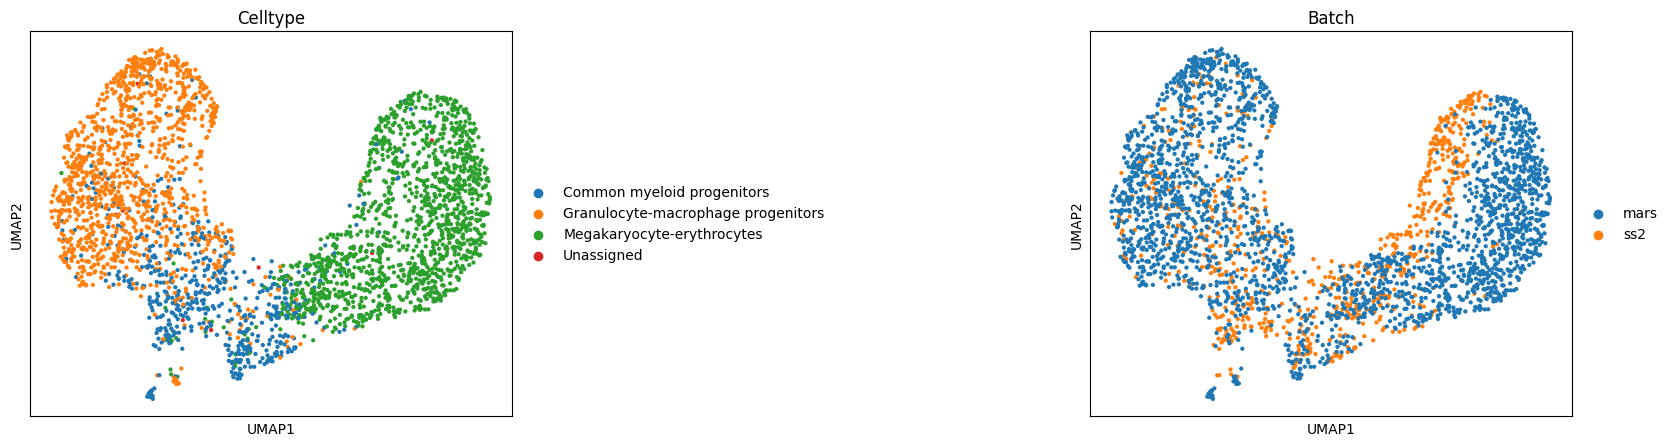

In [54]:
temporary_HVG = AnnData(deepcopy(adata_results.obsm['atlas HVG denoised']))
temporary_HVG.obs = adata_results.obs

sc.pp.normalize_total(temporary_HVG)
sc.pp.log1p(temporary_HVG, copy=False)
sc.pp.scale(temporary_HVG)
sc.tl.pca(temporary_HVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_HVG, n_neighbors = 15)
sc.tl.umap(temporary_HVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_HVG, color = ["celltype",  "study"],  title = ['Celltype',  'Batch'], wspace=1,  ncols=2)

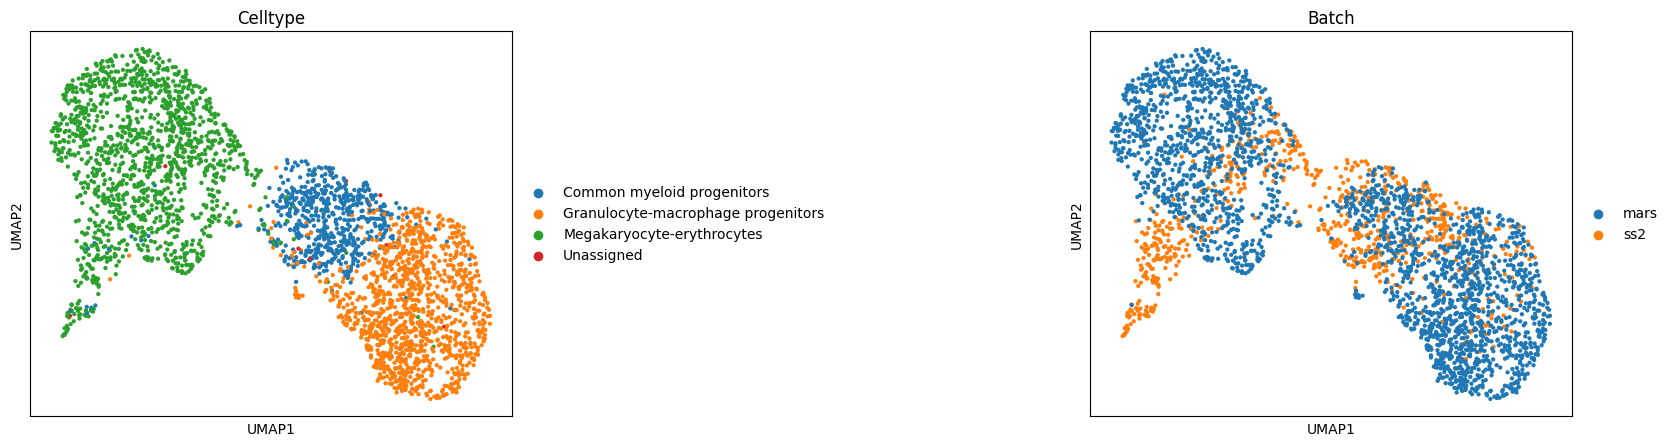

In [55]:
temporary_LVG = AnnData(deepcopy(adata_results.obsm['atlas LVG denoised']))
temporary_LVG.obs = adata_results.obs

sc.pp.normalize_total(temporary_LVG)
sc.pp.log1p(temporary_LVG, copy=False)
sc.pp.scale(temporary_LVG)
sc.tl.pca(temporary_LVG, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_LVG, n_neighbors = 15)
sc.tl.umap(temporary_LVG)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_LVG, color = ["celltype",  "study"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)

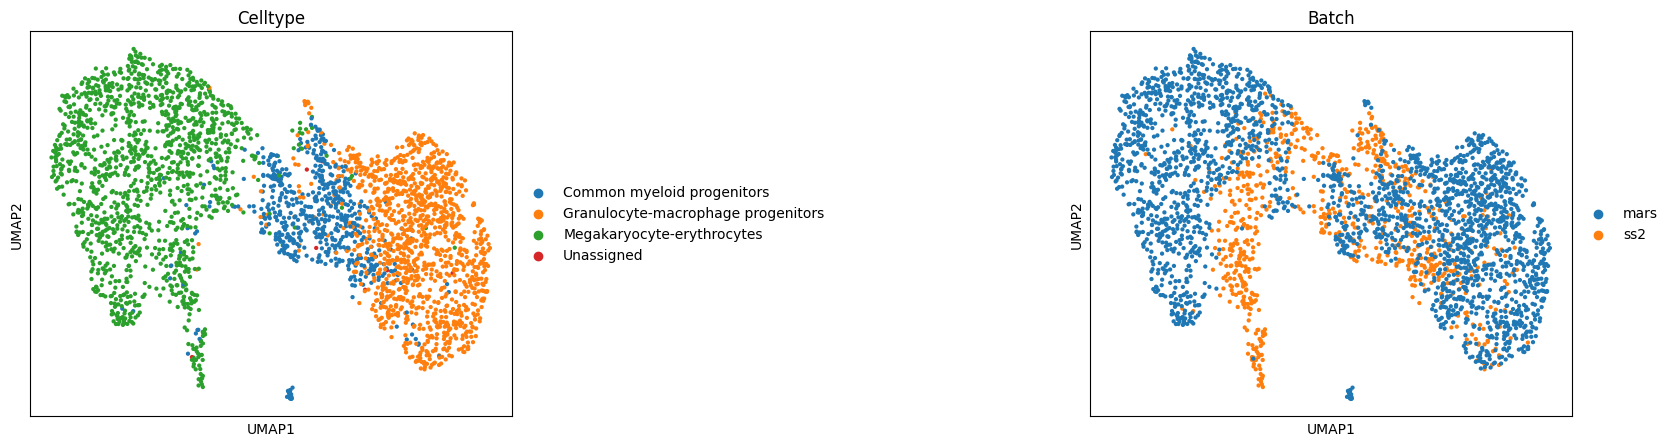

In [56]:
temporary_ALL = AnnData(deepcopy(np.concatenate((adata_results.obsm["atlas HVG denoised"], adata_results.obsm["atlas LVG denoised"]), axis=1)))
temporary_ALL.obs = adata_results.obs

sc.pp.normalize_total(temporary_ALL)
sc.pp.log1p(temporary_ALL, copy=False)
sc.pp.scale(temporary_ALL)
sc.tl.pca(temporary_ALL, n_comps=30, svd_solver='arpack')
sc.pp.neighbors(temporary_ALL, n_neighbors = 15)
sc.tl.umap(temporary_ALL)

plt.rcParams["figure.figsize"] = (5, 5)
sc.pl.umap(temporary_ALL, color = ["celltype",  "study"], title = ['Celltype',  'Batch'], wspace=1, ncols=2)